In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('F:\\MCA\\trim3\\diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

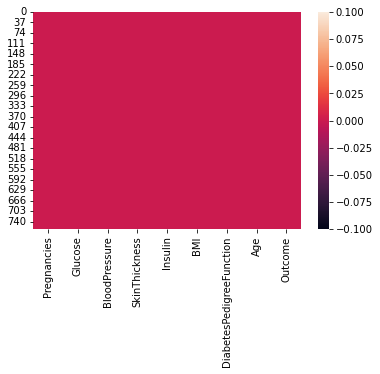

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


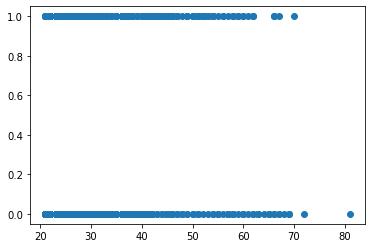

In [7]:
plt.scatter(df.Age,df.Outcome)

In [8]:
Y=df.Outcome

In [9]:
X=df.drop(['Outcome'],axis=1)

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### 80:20

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\VAIBHAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred=model.predict(X_test)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [16]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[98,  9],
       [18, 29]], dtype=int64)

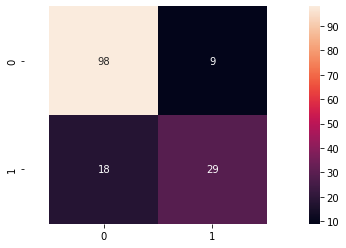

In [17]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 70:30


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [19]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\VAIBHAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred=model.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [22]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[141,  16],
       [ 35,  39]], dtype=int64)

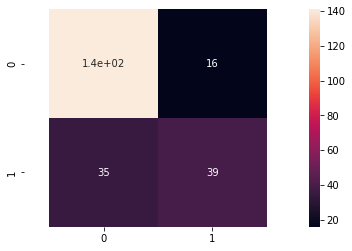

In [23]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 90:10

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [25]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\VAIBHAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



In [28]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[48,  3],
       [ 7, 19]], dtype=int64)

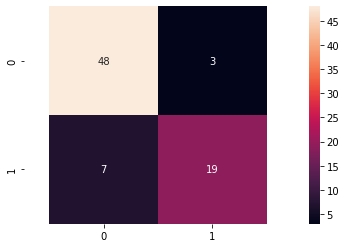

In [29]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 60:40 


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

In [31]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\VAIBHAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=model.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       205
           1       0.80      0.55      0.66       103

    accuracy                           0.81       308
   macro avg       0.80      0.74      0.76       308
weighted avg       0.80      0.81      0.79       308



In [34]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[191,  14],
       [ 46,  57]], dtype=int64)

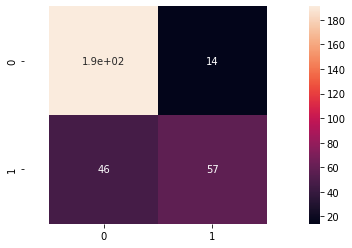

In [35]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 50:50

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=0)

In [37]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\VAIBHAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=model.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       253
           1       0.74      0.56      0.64       131

    accuracy                           0.78       384
   macro avg       0.77      0.73      0.74       384
weighted avg       0.78      0.78      0.78       384



In [40]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[227,  26],
       [ 57,  74]], dtype=int64)

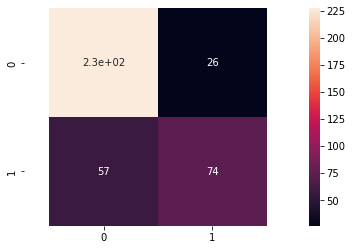

In [41]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

# Standardized 

In [42]:
from sklearn import preprocessing
#get col names first
names=X.columns
#create the Scalar Object
scaler=preprocessing.StandardScaler()
#fit your data on the scaler obj
scaled_df=scaler.fit_transform(X)
X=pd.DataFrame(scaled_df,columns=names)




In [43]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


### 80:20


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [45]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred=model.predict(X_test)

In [47]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [49]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[98,  9],
       [18, 29]], dtype=int64)

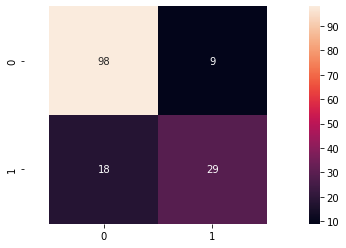

In [50]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 70:30 

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [52]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=model.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [55]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[141,  16],
       [ 35,  39]], dtype=int64)

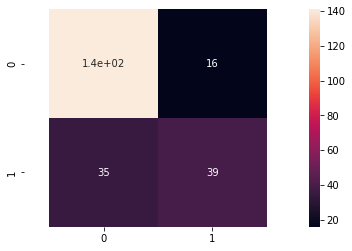

In [56]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 90:10

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [58]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred=model.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



In [61]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[48,  3],
       [ 7, 19]], dtype=int64)

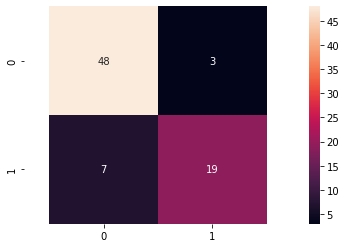

In [62]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 50 :50 

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=0)

In [64]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred=model.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       253
           1       0.75      0.57      0.65       131

    accuracy                           0.79       384
   macro avg       0.78      0.74      0.75       384
weighted avg       0.78      0.79      0.78       384



In [67]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[228,  25],
       [ 56,  75]], dtype=int64)

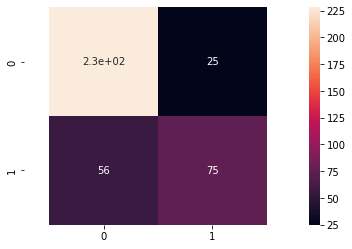

In [68]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

### 60:40

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

In [70]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [71]:
y_pred=model.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       205
           1       0.76      0.53      0.63       103

    accuracy                           0.79       308
   macro avg       0.78      0.73      0.74       308
weighted avg       0.79      0.79      0.78       308



In [73]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[188,  17],
       [ 48,  55]], dtype=int64)

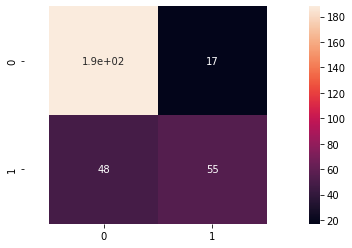

In [74]:
sns.heatmap(cf,annot=True)
plt.axis('equal')
plt.show()

# Most accurate model is of split 90:10 with accuracy of 87%